### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

> - Independent variable: congruency/incongruency between a written color's name in words and the *ink color* the word is written in. 
- Dependent variable: respondent's reaction time to naming the *ink color*.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

> In this experiment, we test to see if there is a difference in reactions times between congruent and incongruent color words.<br><br>
The null hypothesis: Reaction times for incongruent color words are equal to reaction times for congruent color words. <br>
$H_{0} : p_{incongruent} = p_{congruent}$ <br><br>
The alternative hypothesis: Reaction times for incongruent color words are not equal to reaction times for congruent color words.
$H_{1} : p_{incongruent} ≠ p_{congruent}$ <br><br>
<br><br>
We determine if our finding is statistically significant by comparing the p-value (pval) of our tests against the probability of making Type I errors (α).<br><br>
$α = 0.05$, <br><br>
$pval≤α⇒$ Reject $H_0$ <br><br>
$pval>α⇒$ Fail to Reject $H_0$ 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('stroopdata.csv')

In [24]:
df.shape

(24, 3)

In [13]:
# Perform the analysis here
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


> Study participants have longer (slower) reaction times when color name and ink color are incongruent on average, at the minimum, and at the maximum. Additionally, there appears to be greater variability between respondents when the color name and ink are incongruent.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

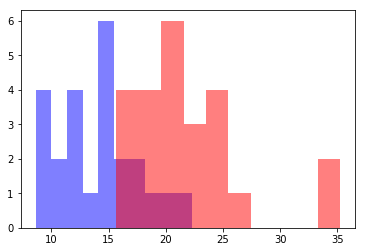

In [19]:
# Build the visualizations here
plt.hist(df['Congruent'], alpha=0.5, color='blue');
plt.hist(df['Incongruent'], alpha=0.5, color='red');

> Both congruent and incongruent color word reaction times skew right. As above, the distribution for incongruent color word reaction times show longer reactions.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [39]:
# Perform the statistical test here
df['diff'] = df['Incongruent'] - df['Congruent']

In [50]:
diffs = []
for _ in range(10000):
    b_samp = df['diff'].sample(df.shape[0], replace=True)
    diffs.append(b_samp.mean())
diffs = np.array(diffs)

In [51]:
null_values = np.random.normal(0, diffs.std(), diffs.size)

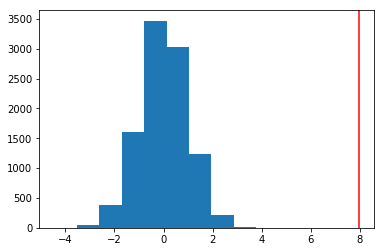

In [52]:
obs_diff = df['diff'].mean()
plt.hist(null_values)
plt.axvline(obs_diff, c='red')

In [57]:
(null_values > obs_diff).mean()

0.0

In [ ]:
--write answer here--

In [60]:
import scipy.stats as sp


In [69]:
sp.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

In [83]:
sp.t.ppf(1-0.025, 24)

2.0638985616280205